# Лабораторная работа 1

# Жиделев Сергей, РИ-401002, 15 вариант

In [59]:
import numpy as np
import pandas as pd
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
from scipy.stats import skew
from scipy.stats import kurtosis


2-3 задание

In [60]:
X = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)

4 задание

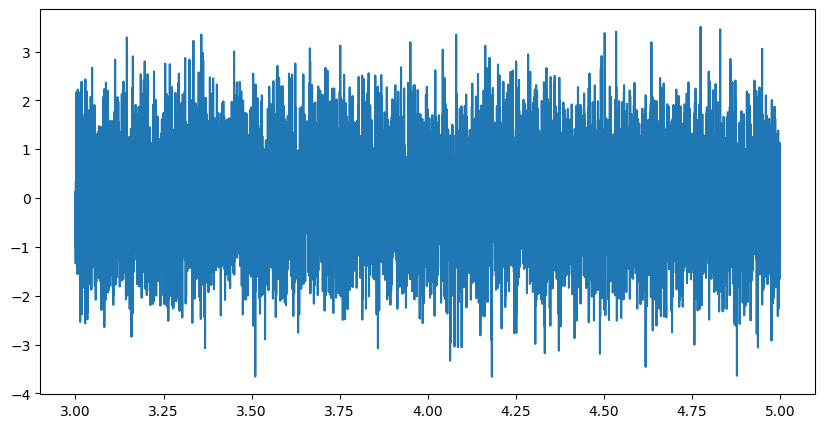

In [61]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

Все функции для расчётов мат. ожидания, дисперсии, ассиметрии и эксцесса были помещены в класс.

In [62]:
class Charac:
    def __init__(self, X):
        self.X = X

    def __call__(self):
        print(self.average(self.X), self.var(self.X), self.assim(self.X),
              self.exx(self.X))

    def average(self, X):
        return f"Мат. ожидание: {((np.sum(X)/len(X)).round(5), round(np.mean(X), 5))}"

    def var(self, X):
        return f'Дисперсия: {((np.sum((X - np.mean(X))**2)/len(X)).round(5), round(np.var(X), 5))}\n'

    def assim(self, X):
        m3 = np.sum((X - np.mean(X))**3)/len(X)
        sigm3 = np.var(X)**1.5
        return f'Ассиметрия: {((m3/sigm3).round(4), round(skew(X), 4))}\n'

    def exx(self, X):
        m4 = np.sum((X - np.mean(X))**4)/len(X)
        sigm4 = np.var(X)**2
        return f' Эксцесс: {((m4/sigm4).round(3), round(kurtosis(X, fisher=False, bias = True), 3))}\n'


Аналогично, здесь в класс были помещены все функции для отрисовки нужных графиков

In [63]:
class Autocorr:
    def __init__(self, X):
        self.X = X

    def __call__(self):
        self.plot_acf(self.X)
        self.correlate(self.X)
        self.acF(self.X)

    def plot_acf(self, X):
        plot_acf(X, lags = 20)
        plt.show()

    def correlate(self, X):
        h = np.correlate(X, X, mode = 'full')[len(X)-1:]/len(X)/np.var(X)
        plt.stem(h[:20])
        plt.title("Numpy Autocorrelation")
        plt.show()

    def acF(self, X):
        df = pd.DataFrame(X)
        plt.stem([((df - df.mean())*(df.shift(i)-df.mean())).mean()/df.var() for i \
           in range (20)])
        plt.title("Handmade Autocorrelation")
        plt.show()

In [64]:
test = Charac(X)
test()

Мат. ожидание: (0.00552, 0.00552) Дисперсия: (0.99172, 0.99172)
 Ассиметрия: (0.0228, 0.0228)
  Эксцесс: (2.995, 2.995)



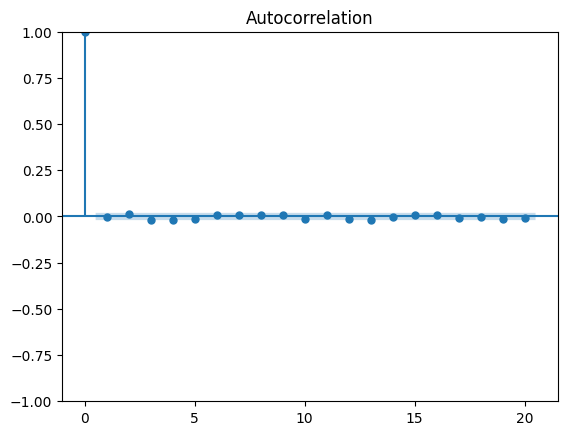

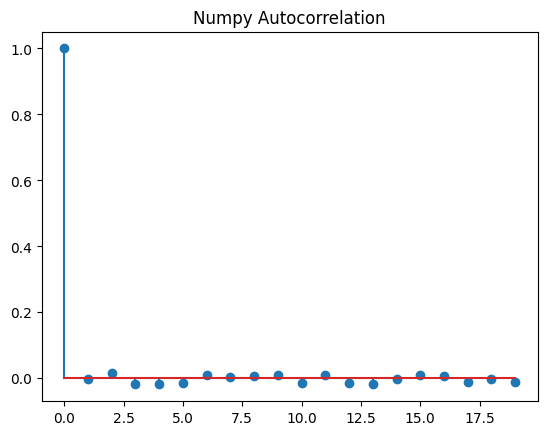

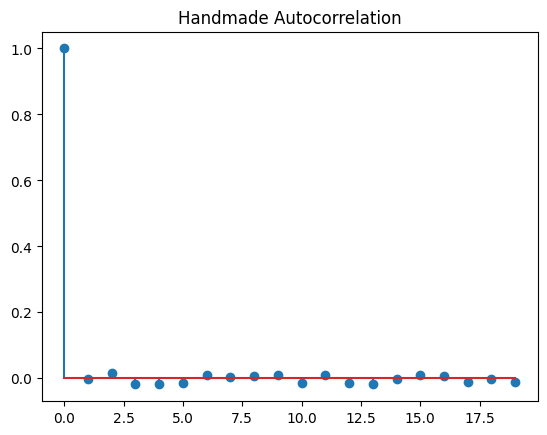

In [65]:
test = Autocorr(X)
test()

**Вариант 15**

In [66]:
Xmat = h5py.File('15.mat', 'r')
Xmat = Xmat.get('z15')
Xmat = np.array(Xmat)
Xmat.ravel()

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '15.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
Xmat = Xmat.ravel()

In [ ]:
plt.plot(Xmat)

13. Вычисление количественных характеристик

In [ ]:
result = Charac(Xmat)
result()
result_plot = Autocorr(Xmat)
result_plot()

14.

Мат. ожидание - показывает в какой точке находится центр распределения. Характеристика чувствительна к выбросам.

Дисперсия - показывает насколько значения далеки от своего центра распределения.

Асимметрия -  характеризует меру скошенности графика влево / вправо.

Эксцесс –  характеризует меру высоты графика.

15. Спектральные характеристики

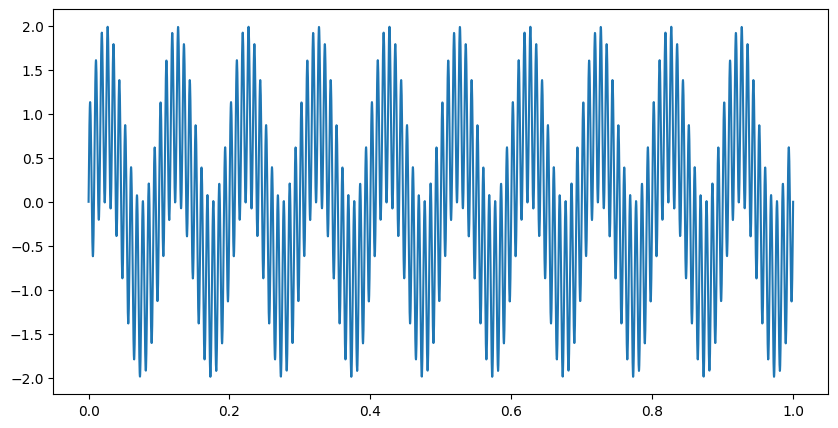

In [67]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)
plt.show()

16.

Мат. ожидание: (0.0, 0.0) Дисперсия: (0.99976, 0.99976)
 Ассиметрия: (0.0, 0.0)
  Эксцесс: (2.251, 2.251)



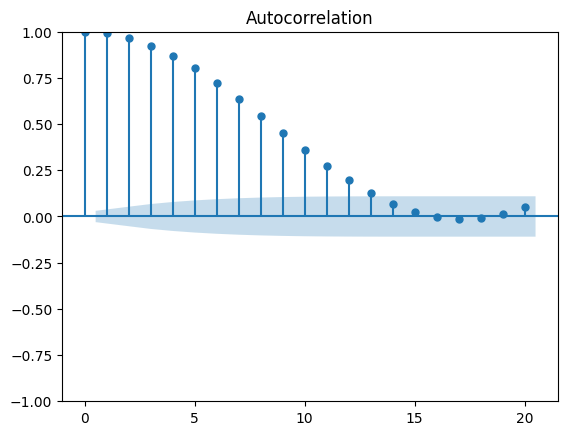

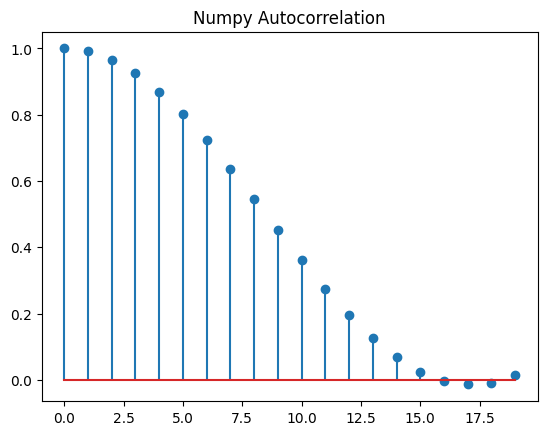

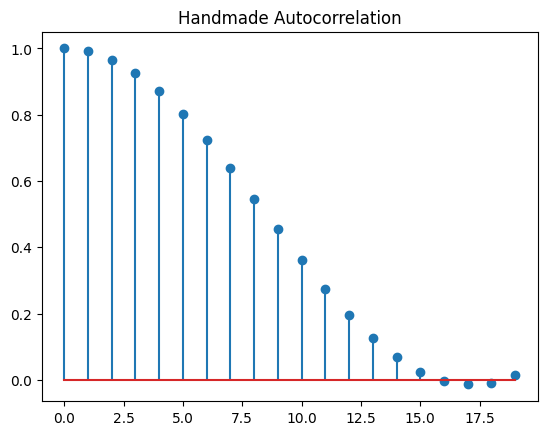

In [68]:
result_x1 = Charac(x1)
result_x1()
result_x1_plot = Autocorr(x1)
result_x1_plot()

17. Оценка периодограммы

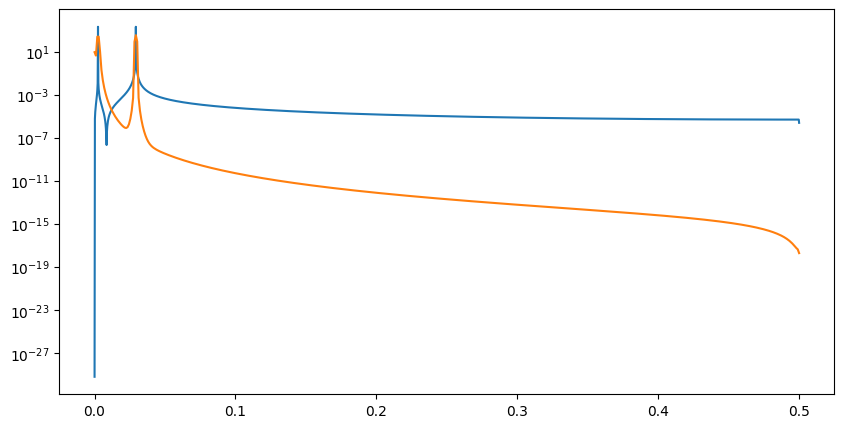

In [69]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)
plt.show()


18.

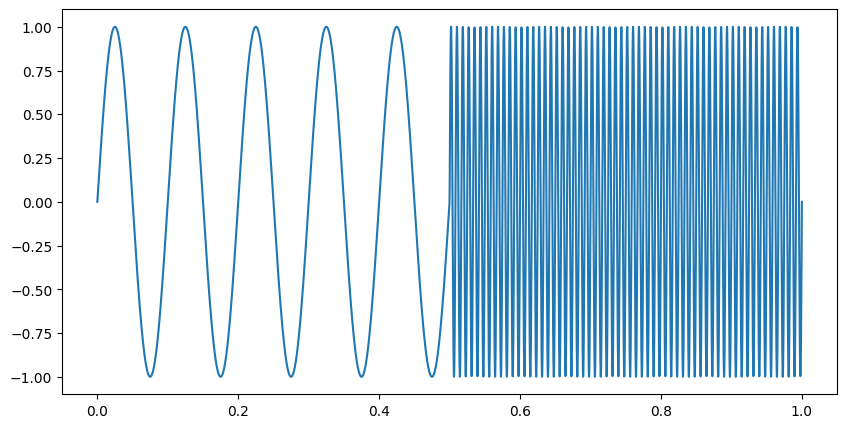

In [70]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])

plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

19. Велш и периодограмма

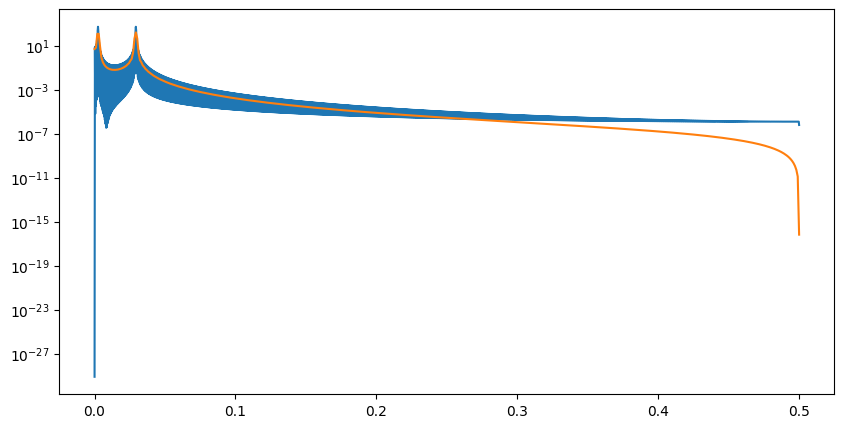

In [71]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)
plt.show()


20.

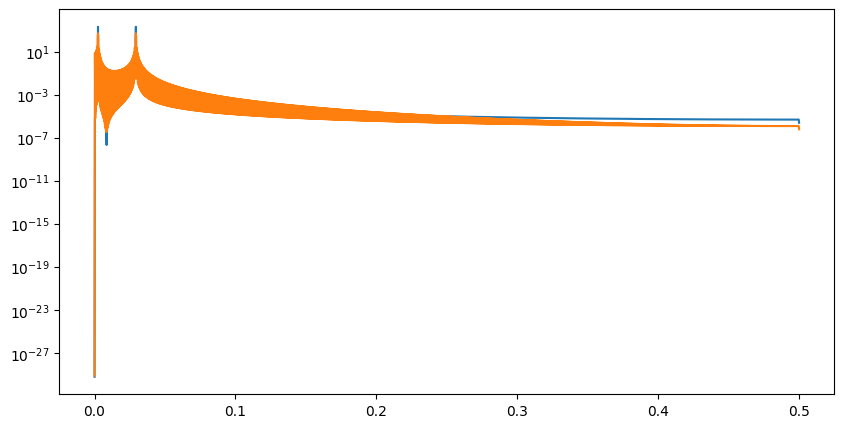

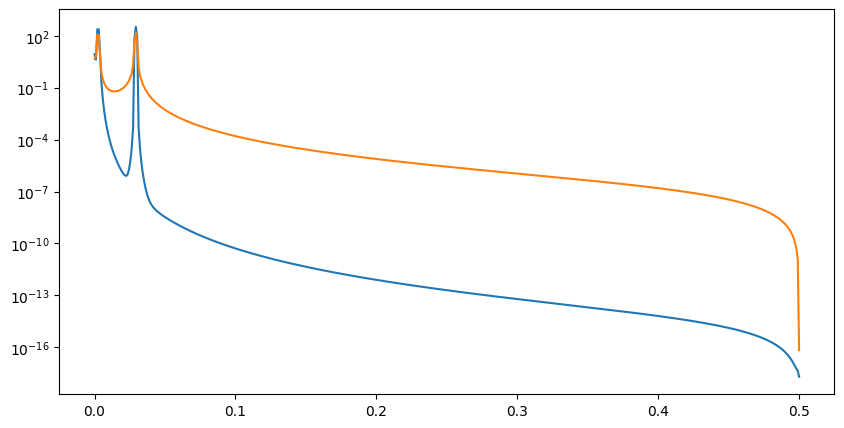

In [72]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pd2, pdden2)
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1)
plt.semilogy(pdw2, pddenw2)
plt.show()


21-22. Спектрограмма

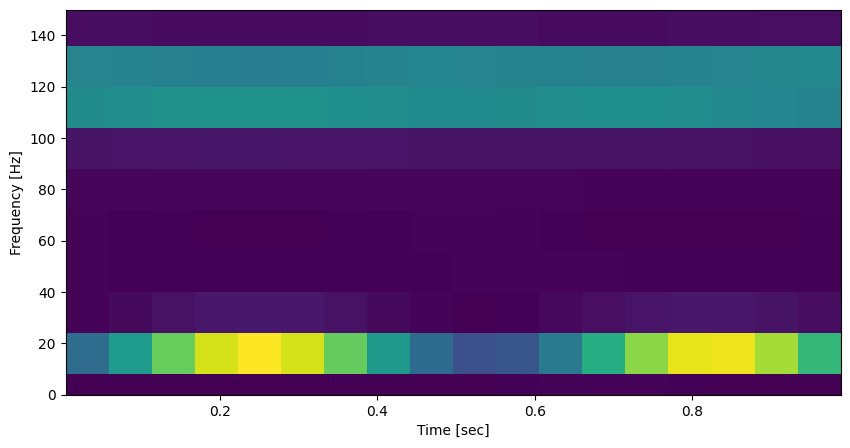

In [73]:
fs = 1/(t[1]-t[0])

f, tx, Sxx = signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()


23.

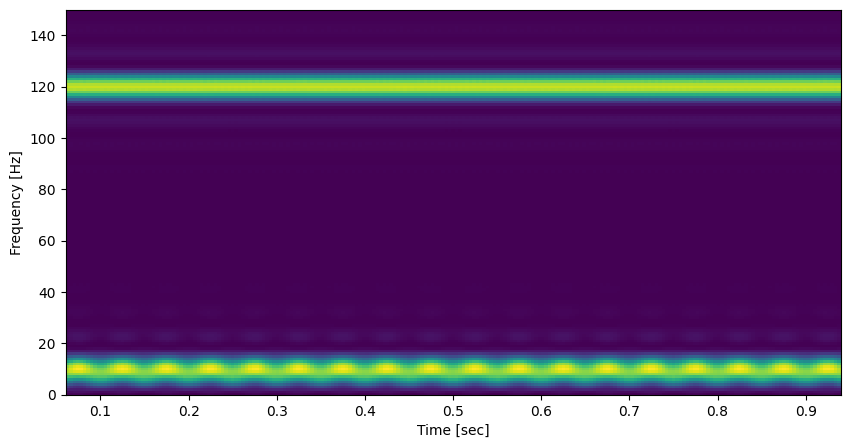

In [74]:
f, tx, Sxx = signal.spectrogram(x1, fs, nperseg = 512, noverlap = 496, nfft=4096)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

24.

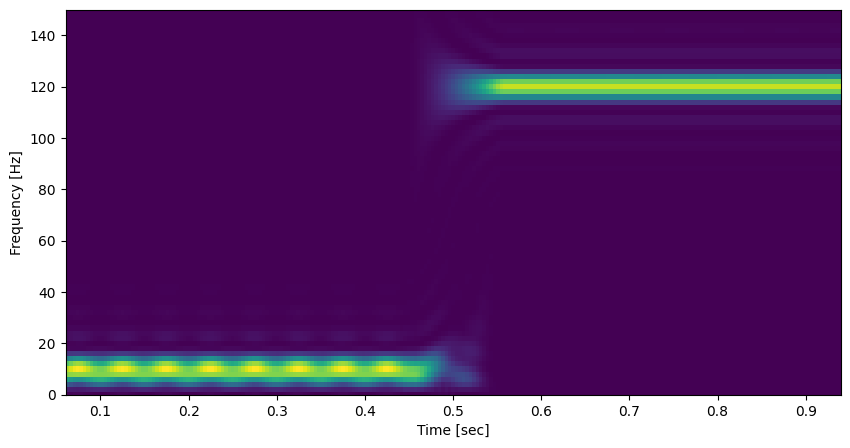

In [75]:
f, tx, Sxx = signal.spectrogram(x2, fs, nperseg = 512, noverlap = 496, nfft=2048)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

При сравнении двух спектограмм, на первой четко видно, что несмотря на время, изломов нет, что нельзя сказать о втором графике: излом происходит в точке t = 0.5

25.

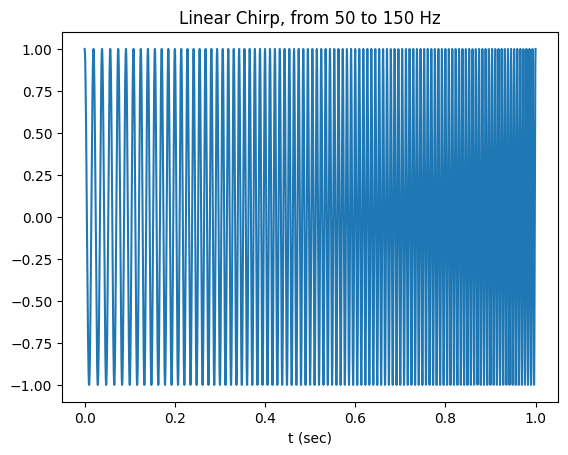

In [76]:
tx = np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear')
# от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()


26.

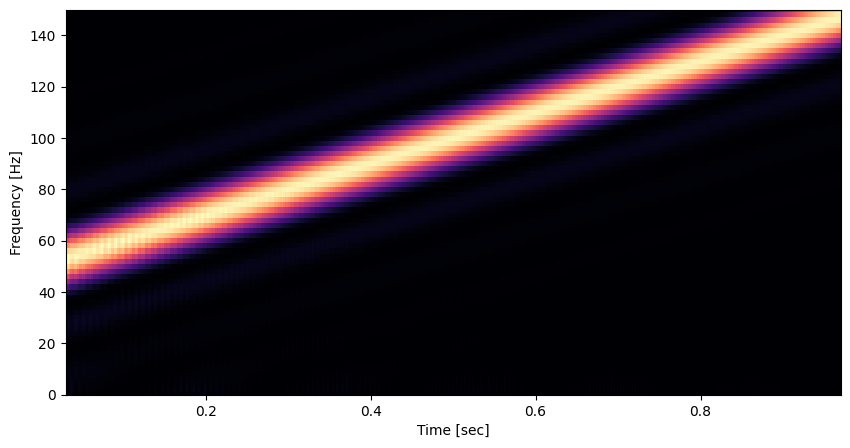

In [77]:
fs = 1/(tx[1]-tx[0])
f, tx, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto', cmap = 'magma')
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

27-28.

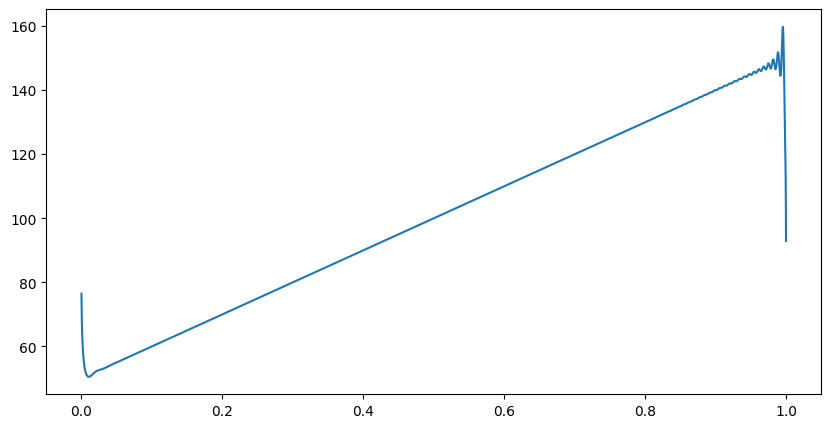

In [78]:
tx = np.linspace(0, 1, 8192)

analytic_signal = signal.hilbert(w) # аналитический сигнал

instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде

instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fs)# мгновенная частота как производная от фазы, приведенная в Гц

plt.figure(figsize = (10, 5)) # из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:

plt.plot(tx[1:], instantaneous_frequency[0:])
plt.show()

29.

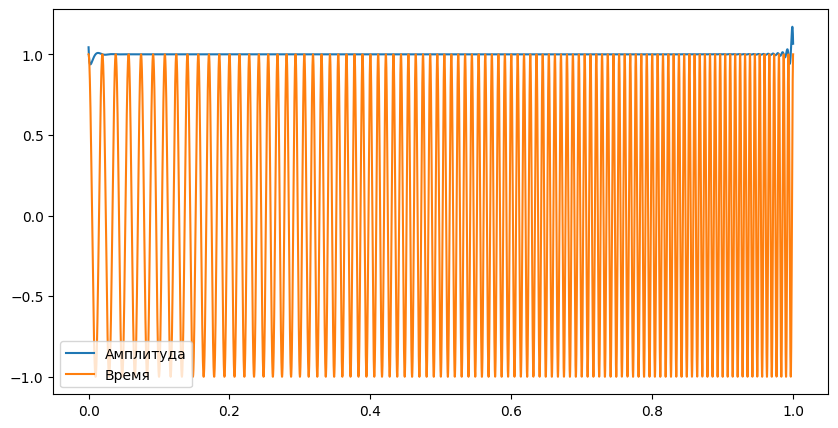

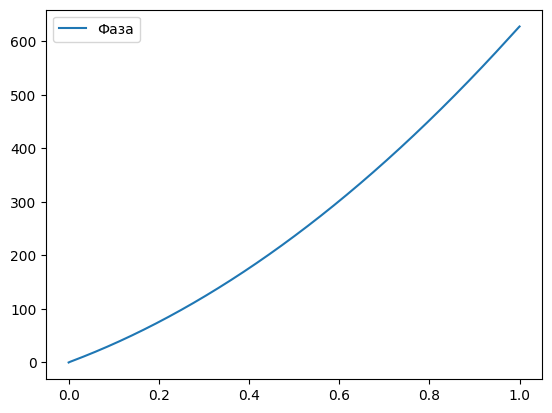

In [79]:
inst_ampl = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))

plt.figure(figsize=(10, 5))
plt.plot(tx, inst_ampl, label="Амплитуда")
plt.plot(tx, w, label="Время")
plt.legend(loc="lower left")
plt.show()

plt.plot(tx, instantaneous_phase, label="Фаза")
plt.legend(loc="upper left")
plt.show()

30.

Класс для вычисления и построения частотно-временных характеристик ряда

In [90]:
def ranks(x, t):

    #здесь вычисляем

    pd, pdden = signal.periodogram(x) # периодограмма
    pdw, pddenw = signal.welch(x, nperseg = 1024) # спектры Велша

    fs = 1/(t[1] - t[0])
    f, tx, Sxx = signal.spectrogram(x, fs, nperseg = 512, noverlap = 496, nfft=4096)

    analytic_signal = signal.hilbert(x)
    inst_ampl = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fs)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))

    #здесь строим
    plt.figure(figsize=(10, 5))
    plt.plot(t[1:], inst_ampl[1:], label="Амплитуда", linewidth=3)
    plt.plot(t[1:], x[1:], label="Время", linewidth=0.5)
    plt.legend(loc="lower left")
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.semilogy(pd, pdden)
    plt.semilogy(pdw, pddenw)
    plt.title('Welch and periodogram')
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.pcolormesh(tx, f, Sxx, shading = 'auto', cmap = 'magma')
    plt.title('Spectogram')
    plt.ylim(0, 100)
    plt.show()

    plt.figure(figsize = (10, 5))
    plt.plot(t[1:], instantaneous_frequency[0:])
    plt.title('Hilbert')
    plt.show()





**Ряд с квадратичной частотной модуляцией:**

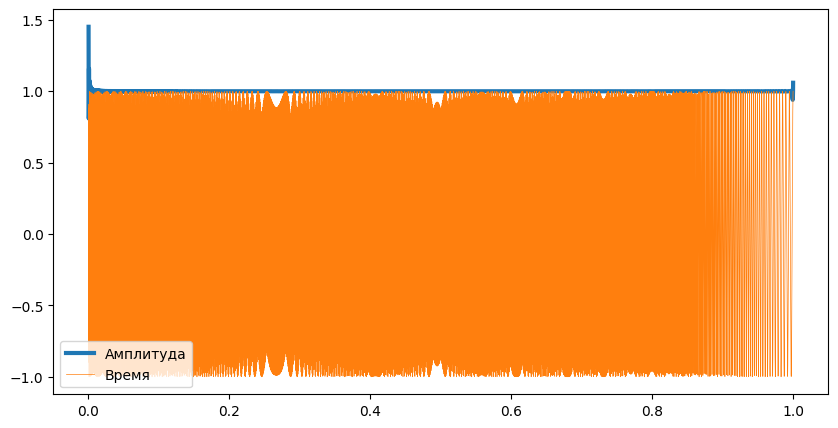

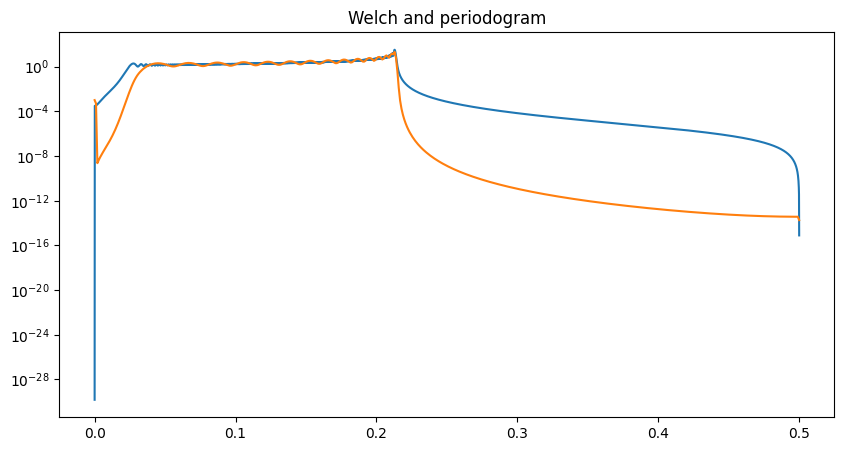

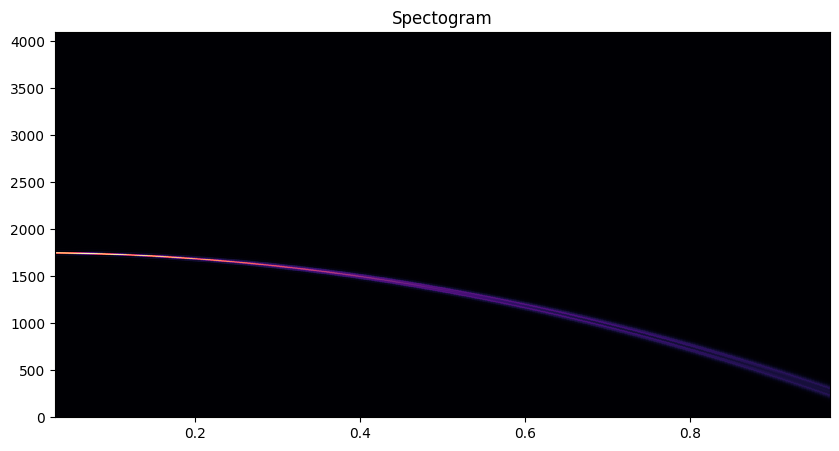

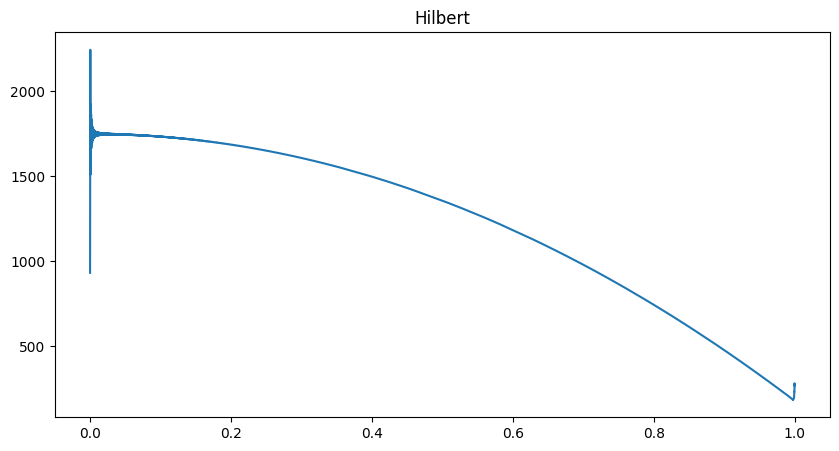

In [81]:
t = np.linspace(0, 1, 8192)# Ряд с квадратичной частотной модуляцией:
x = signal.chirp(t, f0=1750, f1=178, t1=1, method='quadratic')
ranks(x, t)

**Ряд с логарифмической частотной модуляцией**

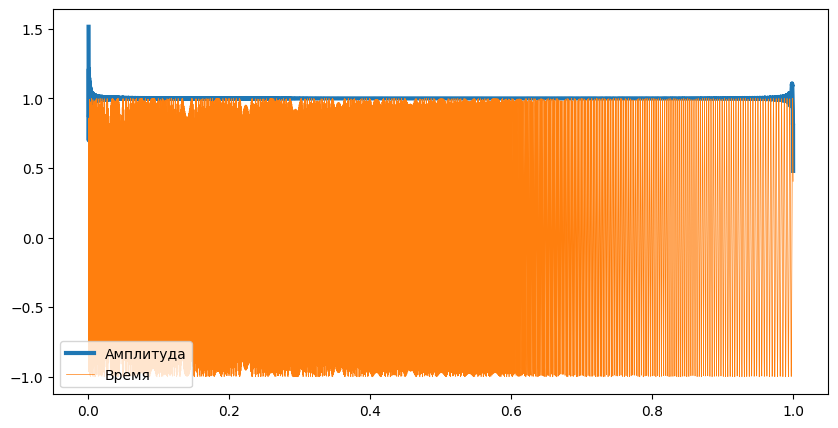

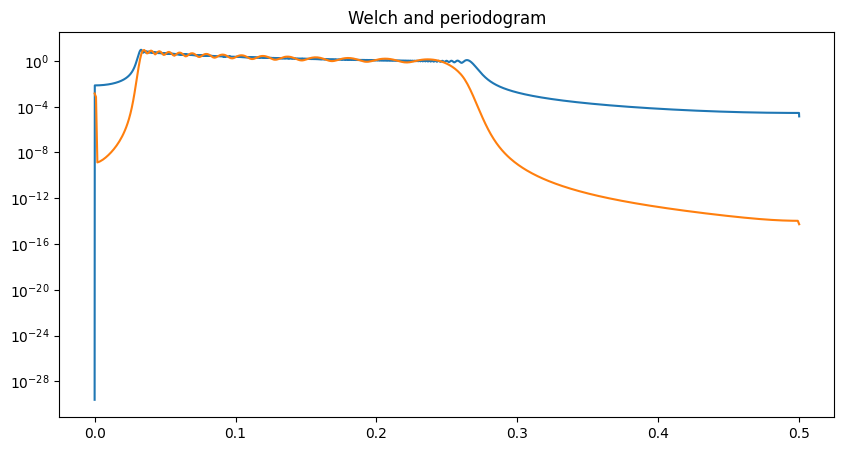

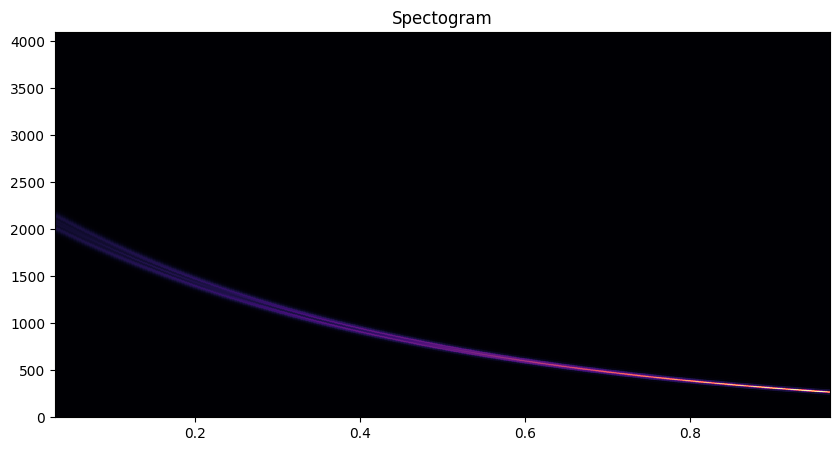

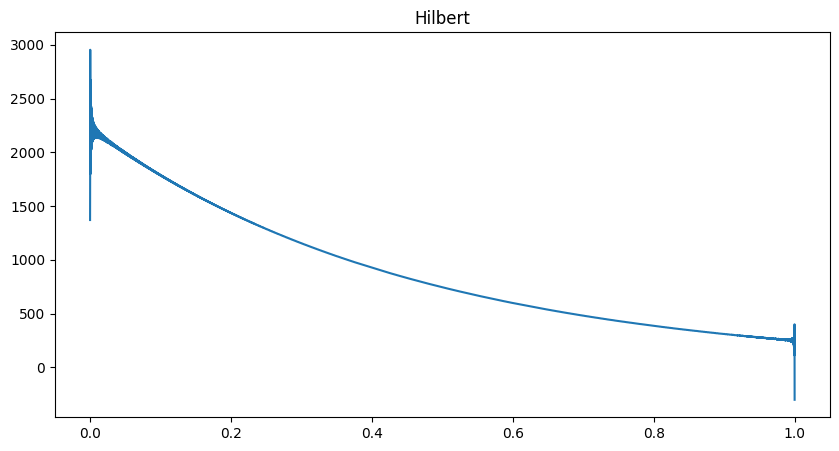

In [82]:
t = np.linspace(0, 1, 8192)
x = signal.chirp(t, f0=2224, f1=250, t1=1, method='logarithmic')
ranks(x, t)

**Ряд с полиномиальной частотной модуляцией:**

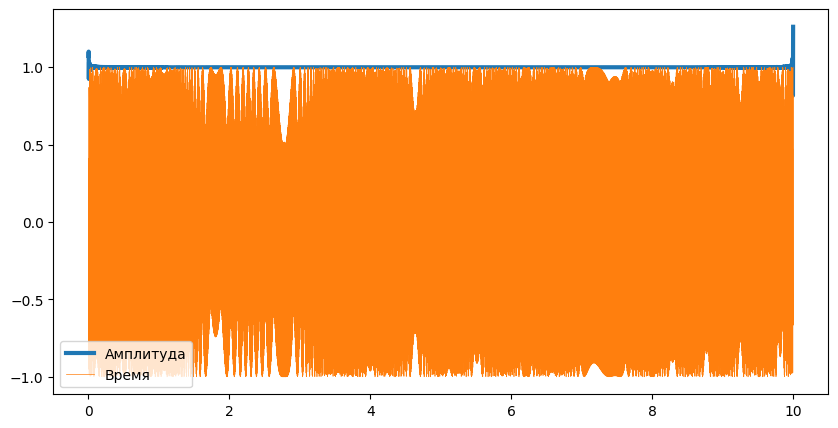

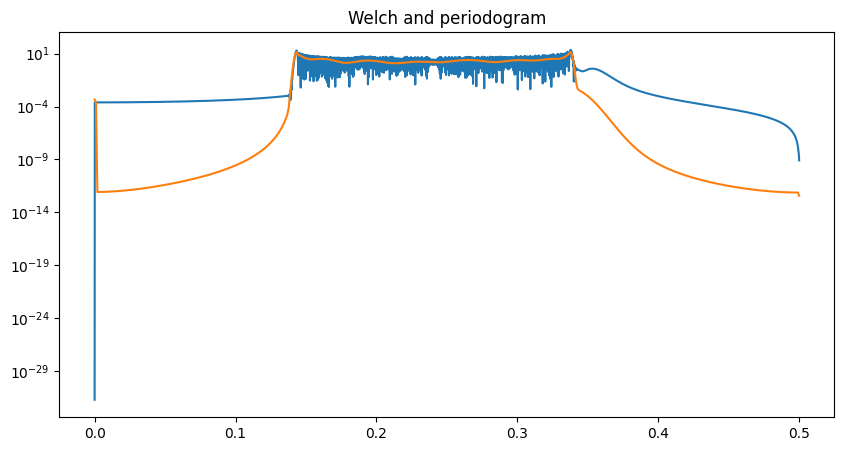

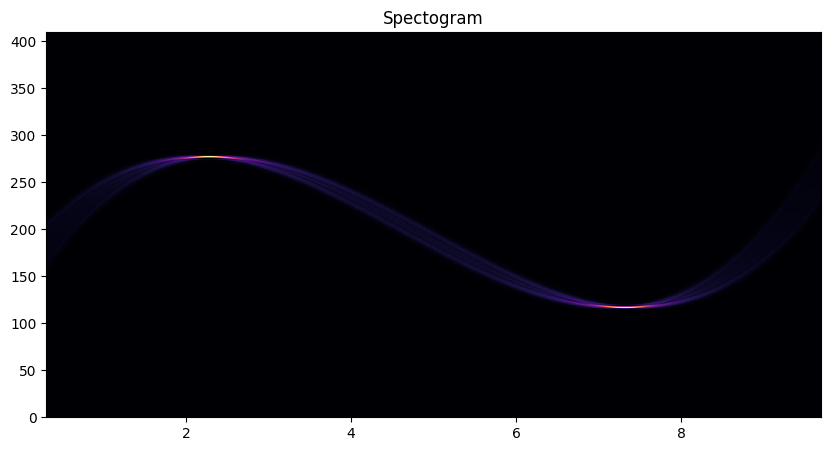

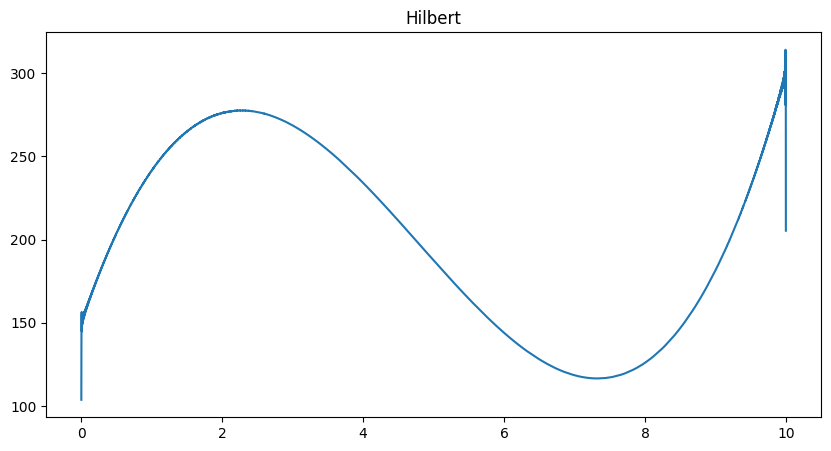

In [83]:
t = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
x = signal.sweep_poly(t, p)
ranks(x, t)

**Ряд с частотной модуляцией другим гармоническим сигналом:**

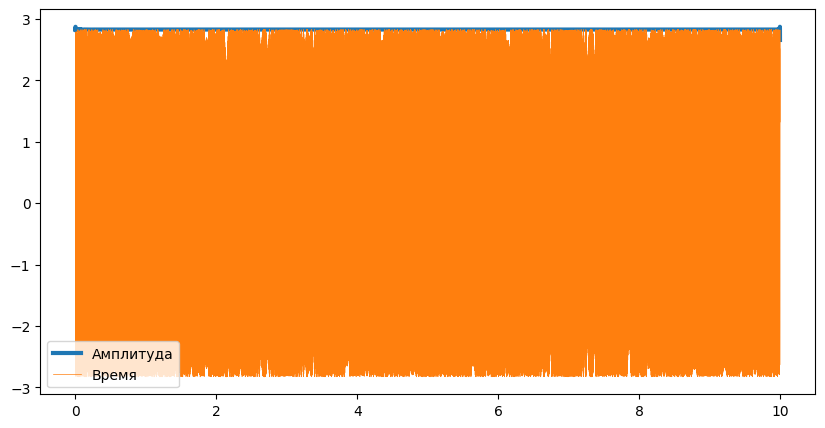

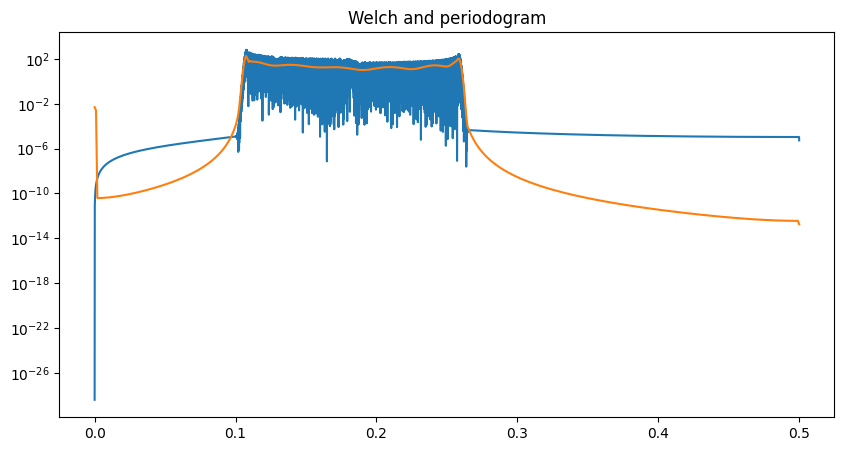

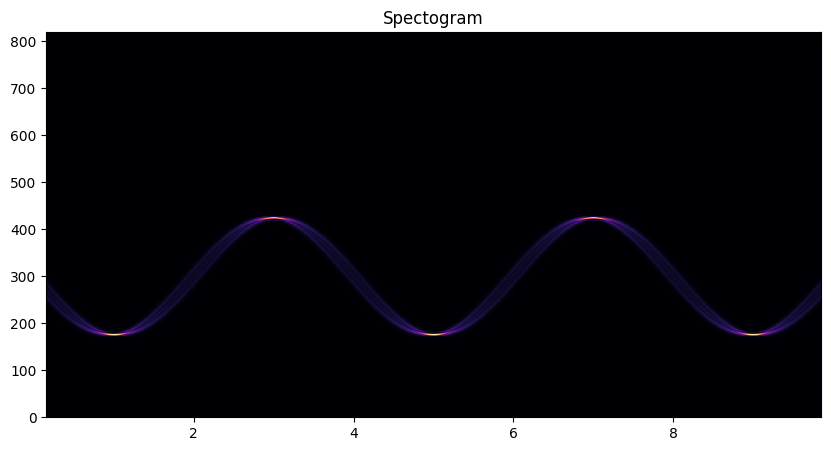

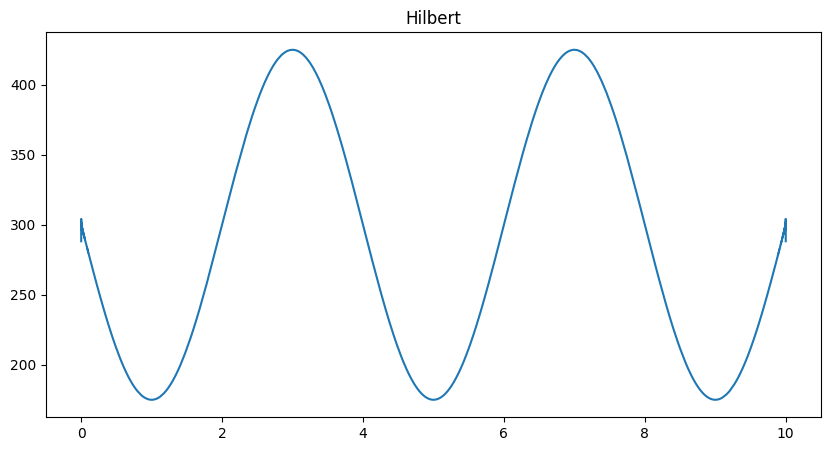

In [84]:
t = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*t)
x = 2 * np.sqrt(2) * np.sin(2*np.pi*300*t + mod)

ranks(x, t)

35.

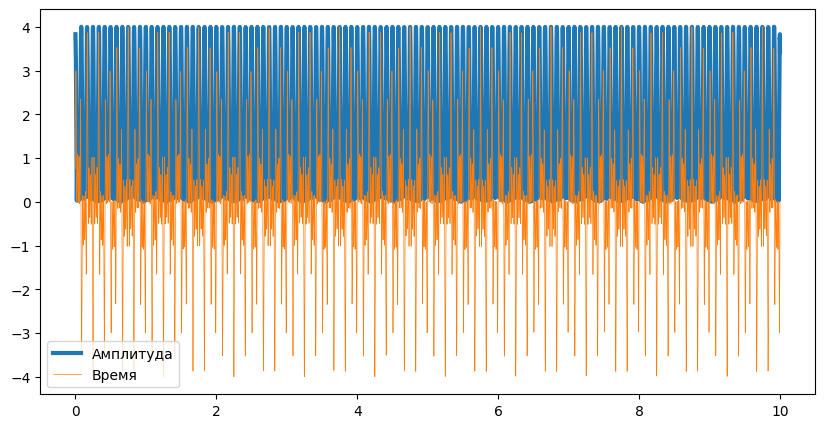

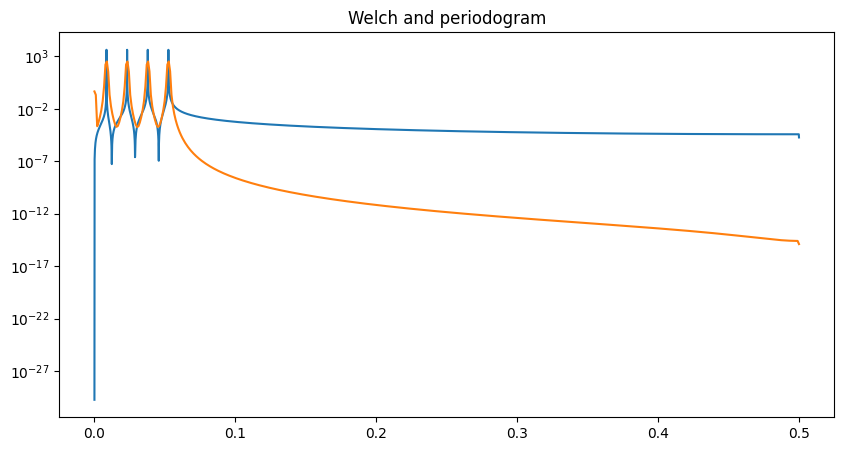

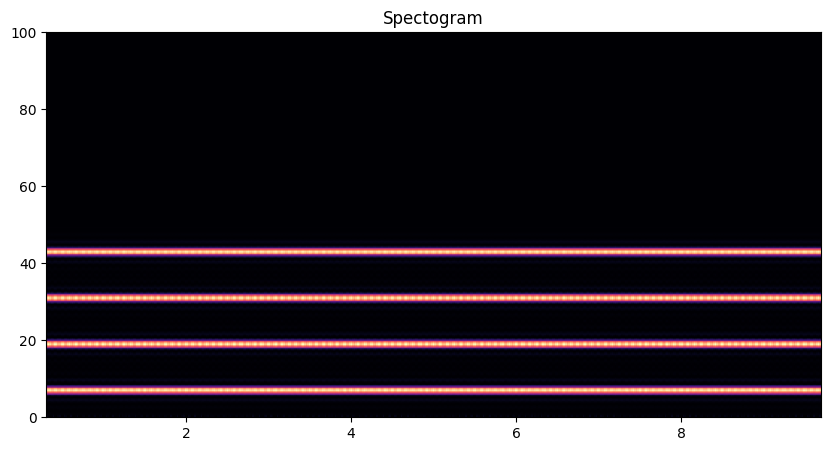

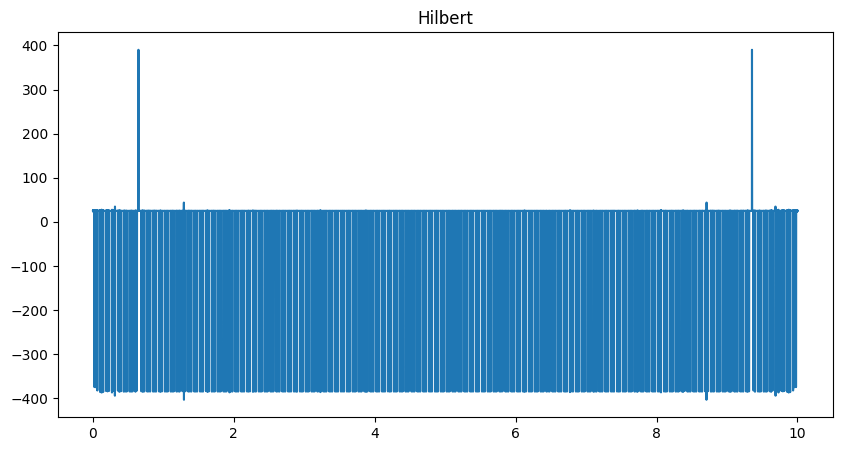

In [92]:
t = np.linspace(0, 10, 8192)
periods = [7, 19, 31, 43]
x = 0
for i in periods:
    x += np.sin(2 * np.pi * i * t)

ranks(x, t)



38.

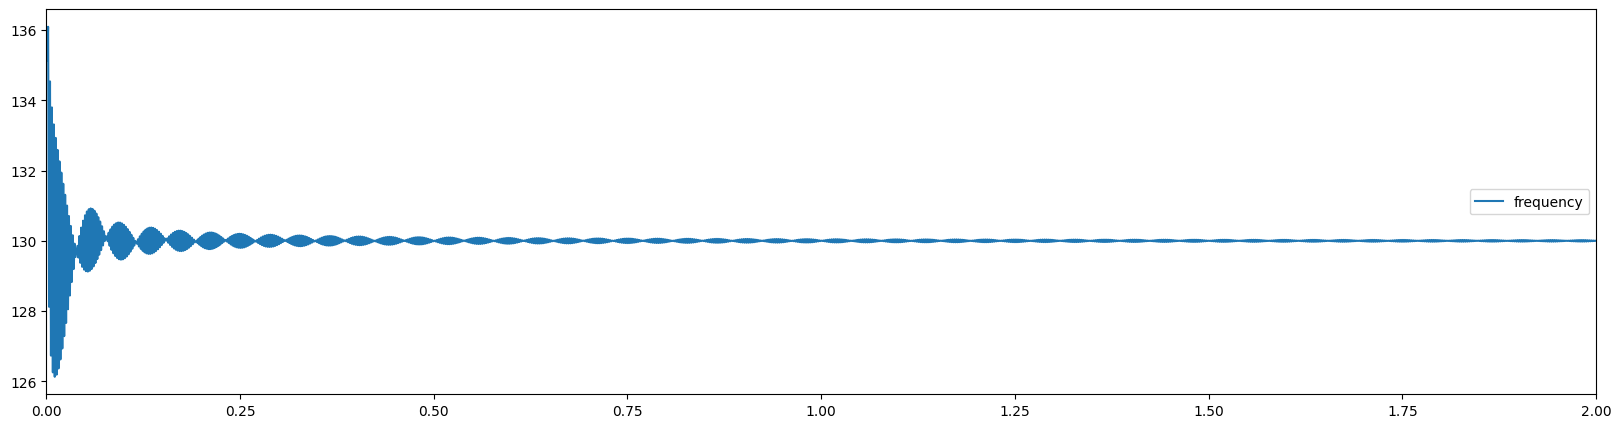

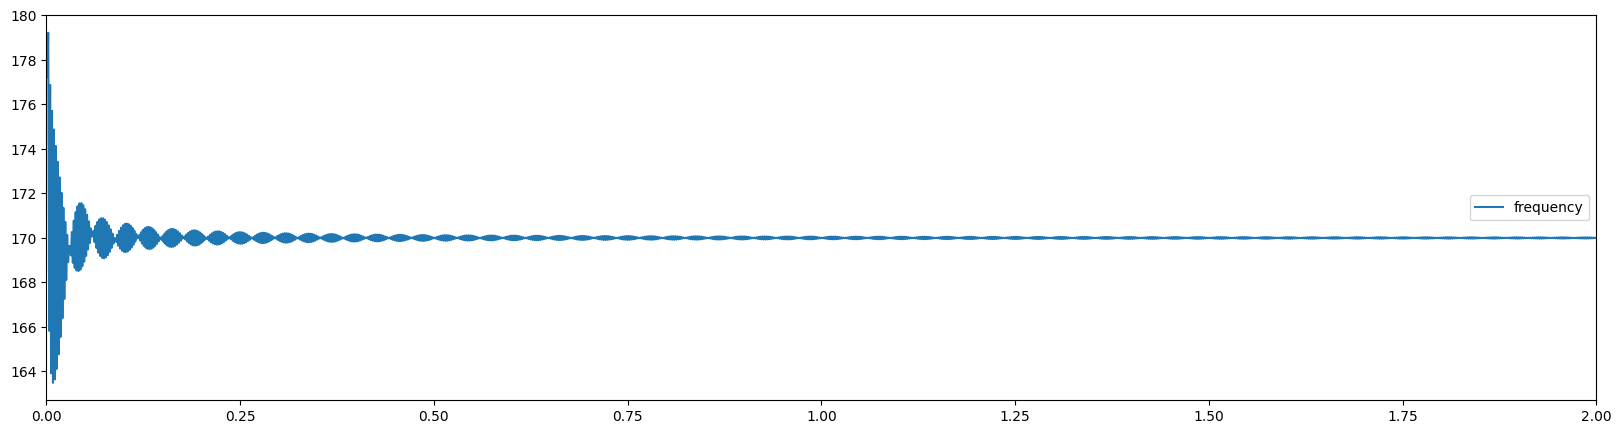

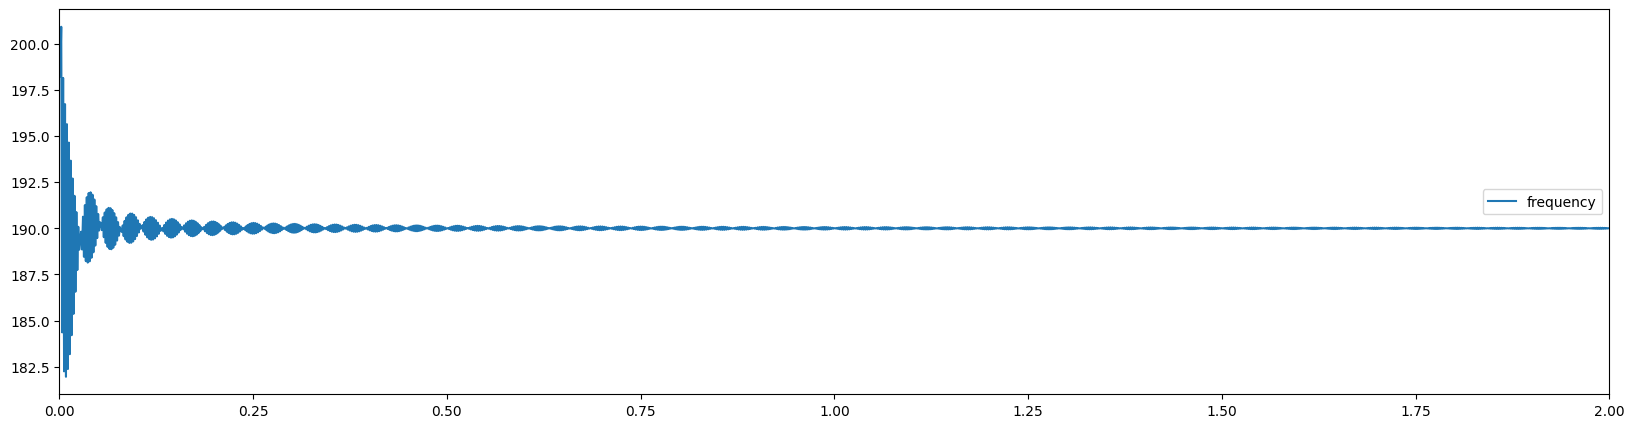

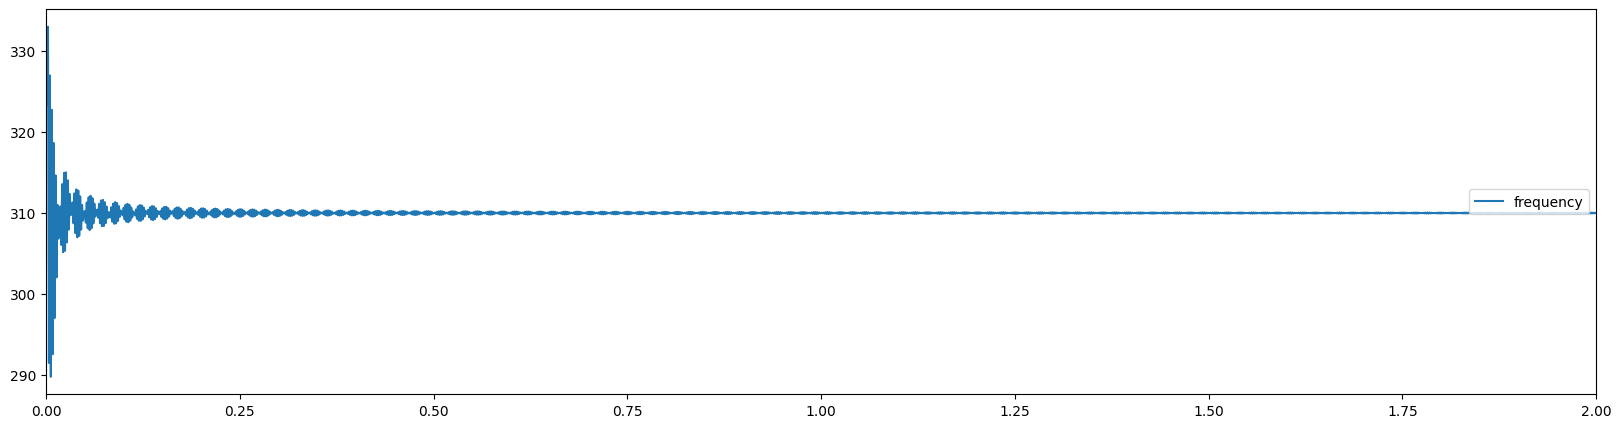

In [86]:
arr = []
for i in periods:
    arr.append(np.sin(2 * np.pi * i * t))

for i in arr:
    analytic_signal = signal.hilbert(i) # аналитический сигнал
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
    instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)*fs)# мгновенная частота как производная от фазы, приведенная в Гц
    plt.figure(figsize = (20, 5))
    plt.xlim(0, 2)
    plt.plot(t[1:], instantaneous_frequency[0:], label="frequency")
    plt.legend(loc="center right")
    plt.show()
